ALI Mohammad Fayyaz, DIOUF Babacar, GESLIN Baptiste, GOUBA Malick, ONGONO OLINGA jean-Galbert, OUEDRHIRI Mohammed 


# Quelles énergies pour demain ?

Pour traiter ce sujet, nous procédons en trois étapes:

- Bilan énergétique: Il s'agira de faire l'état des lieux au niveau mondial, afin de voir les évolutions de la consommation d'énergie globale jusqu'à aujourd'hui.

- Nouvelles Sources d'énergie: nous regardons si des tendances nouvelles apparaîssent pour le futur.

- Sauvés par la technologie: en parallèle, les nouvelles technologies vont-elle permettre de réduire la consommation globale de la population?

In [15]:
import pandas as pd
import warnings
import seaborn as sns
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy import array
from numpy import argmax
import os
import folium
warnings.simplefilter('ignore')

## 1- Bilan Energetique mondial

A l'heure actuelle, nous ne cessons d'entendre parler de réchauffement climatique, d'épuisement des ressources, augmentation de la population mondiale ...
Nous allons regarder quelques indicateurs de la situation actuelle.

In [22]:
coal_lignite_nrj_cons=pd.read_csv('coal and lignite.csv')
electric_nrj_cons=pd.read_csv('electric_domestic_consumption.csv')
natural_gaz_nrj_cons=pd.read_csv('Natural gaz consumption.csv')
Oil_nrj_cons=pd.read_csv('Oil energy consumption domestic.csv')
Total_nrj_cons=pd.read_csv('Total_energy_consumption.csv')

coal_lignite_nrj_cons=coal_lignite_nrj_cons.rename(columns={
    'Unnamed: 0':'Pays',
    })

electric_nrj_cons=electric_nrj_cons.rename(columns={
    'Unnamed: 0':'Pays',
    })

natural_gaz_nrj_cons=natural_gaz_nrj_cons.rename(columns={
    'Unnamed: 0':'Pays',
    })

Oil_nrj_cons=Oil_nrj_cons.rename(columns={
    'Unnamed: 0':'Pays',
    })

Total_nrj_cons=Total_nrj_cons.rename(columns={
    'Unnamed: 0':'Pays',
    })

def evolution(tab):
    tab['evol_ytd']=(tab['2018']/tab['1990']-1)/100
    
evolution(coal_lignite_nrj_cons)
evolution(electric_nrj_cons)
evolution(natural_gaz_nrj_cons)
evolution(Oil_nrj_cons)
evolution(Total_nrj_cons)

coal_lignite_nrj_2018=coal_lignite_nrj_cons.groupby(['Pays'])['2018'].sum().reset_index()
electric_nrj_2018=electric_nrj_cons.groupby(['Pays'])['2018'].sum().reset_index()
natural_gaz_nrj_2018=natural_gaz_nrj_cons.groupby(['Pays'])['2018'].sum().reset_index()
Oil_nrj_2018=Oil_nrj_cons.groupby(['Pays'])['2018'].sum().reset_index()
Total_nrj_2018=Total_nrj_cons.groupby(['Pays'])['2018'].sum().reset_index()

# Contributionn de chaque pays selon l'énergie
coal_lignite_nrj_2018['contribution']=coal_lignite_nrj_2018['2018'][0:len(coal_lignite_nrj_2018)-1]/(coal_lignite_nrj_2018['2018'][0:len(coal_lignite_nrj_2018)-1].sum())
electric_nrj_2018['contribution']=electric_nrj_2018['2018'][0:len(electric_nrj_2018)-1]/(coal_lignite_nrj_2018['2018'][0:len(coal_lignite_nrj_2018)-1].sum())
natural_gaz_nrj_2018['contribution']=natural_gaz_nrj_2018['2018'][0:len(natural_gaz_nrj_2018)]/(natural_gaz_nrj_2018['2018'][0:len(natural_gaz_nrj_2018)-1].sum())
Oil_nrj_2018['contribution']=Oil_nrj_2018['2018'][0:len(Oil_nrj_2018)]/(Oil_nrj_2018['2018'][0:len(Oil_nrj_2018)].sum())
Total_nrj_2018['contribution']=Total_nrj_2018['2018'][0:len(Total_nrj_2018)-1]/(Total_nrj_2018['2018'][0:len(Total_nrj_2018)-1].sum())

coal_lignite_nrj_2018_vf=coal_lignite_nrj_2018.sort_values('contribution',ascending=False)
electric_nrj_2018_vf=electric_nrj_2018.sort_values('contribution',ascending=False)
natural_gaz_nrj_2018_vf=natural_gaz_nrj_2018.sort_values('contribution',ascending=False)
Oil_nrj_2018_vf=Oil_nrj_2018.sort_values('contribution',ascending=False)
Total_nrj_2018_vf=Total_nrj_2018.sort_values('contribution',ascending=False)

Top_10_total_nrj=Total_nrj_2018_vf.iloc[ :10, :] 
Top10_electric=electric_nrj_2018_vf.iloc[ :10, :] 
Top10_natural=natural_gaz_nrj_2018_vf.iloc[ :10, :]
Top10_Oil=Oil_nrj_2018_vf.iloc[ :10, :] 
Top10_Coal_ligni=coal_lignite_nrj_2018_vf.iloc[ :10, :]

Top_10_total_rank=Total_nrj_cons.merge(Top_10_total_nrj)
nrj_coal_rank=coal_lignite_nrj_cons.merge(Top10_Coal_ligni)
nrj_elect_rank=electric_nrj_cons.merge(Top10_electric)
nrj_natural_rank=natural_gaz_nrj_cons.merge(Top10_natural)
nrj_Oil_rank=Oil_nrj_cons.merge(Top10_Oil)

def central_nucleaire(table):
    table['nb_nucleaire']=table['2018']*11630000000/(500000*10*3*12) 
    
Top_10_total_rank['nb_nucleaire']=Top_10_total_rank['2018']*11630000000/(500000*10**3*12)  
nrj_coal_rank['nb_nucleaire']=nrj_coal_rank['2018']*11630000000/(500000*10**3*12) 
nrj_elect_rank['nb_nucleaire']=nrj_elect_rank['2018']*11630000000/(500000*10**3*12) 
nrj_natural_rank['nb_nucleaire']=nrj_natural_rank['2018']*11630000000/(500000*10**3*12) 
nrj_Oil_rank['nb_nucleaire']=nrj_Oil_rank['2018']*11630000000/(500000*10**3*12) 

In [23]:
coal_lignite_nrj_cons = coal_lignite_nrj_cons.rename(columns={"contribution": "coal"})
electric_nrj_cons = electric_nrj_cons.rename(columns={"contribution": "elec"})
natural_gaz_nrj_cons = natural_gaz_nrj_cons.rename(columns={"contribution": "gaz"})
Oil_nrj_cons = Oil_nrj_cons.rename(columns={"contribution": "oil"})

Oil_nrj_cons = Oil_nrj_cons.set_index(["Pays"])
electric_nrj_cons = electric_nrj_cons.set_index(["Pays"])
natural_gaz_nrj_cons = natural_gaz_nrj_cons.set_index(["Pays"])
coal_lignite_nrj_cons = coal_lignite_nrj_cons.set_index(["Pays"])

Oil_nrj_cons = Oil_nrj_cons.loc[['BRICS','Europe','China','United States','India','Japan','Canada','Australia']].drop(columns=['evol_ytd'])
electric_nrj_cons = electric_nrj_cons.loc[['BRICS','Europe','China','United States','India','Japan','Canada','Australia']].drop(columns=['evol_ytd'])
natural_gaz_nrj_cons = natural_gaz_nrj_cons.loc[['BRICS','Europe','China','United States','India','Japan','Canada','Australia']].drop(columns=['evol_ytd'])
coal_lignite_nrj_cons = coal_lignite_nrj_cons.loc[['BRICS','Europe','China','United States','India','Japan','Canada','Australia']].drop(columns=['evol_ytd'])

Top10_electric=Total_nrj_2018_vf.rename(columns={"contribution": "elec"})
Top10_Oil=Oil_nrj_2018_vf.rename(columns={"contribution": "oil"})
Top10_Coal_ligni=coal_lignite_nrj_2018_vf.rename(columns={"contribution": "coal"})
Top10_natural=natural_gaz_nrj_2018_vf.rename(columns={"contribution": "gaz"})

merge = Top10_natural.merge(Top10_Coal_ligni, left_on="Pays",right_on="Pays").merge(Top10_Oil, left_on="Pays",right_on="Pays").merge(Top10_electric, left_on="Pays",right_on="Pays")
merge = merge.set_index('Pays')
merge = merge.loc[['BRICS','Europe','China','United States','India','Japan','Canada','Australia']].drop(columns=['2018_x','2018_y'])


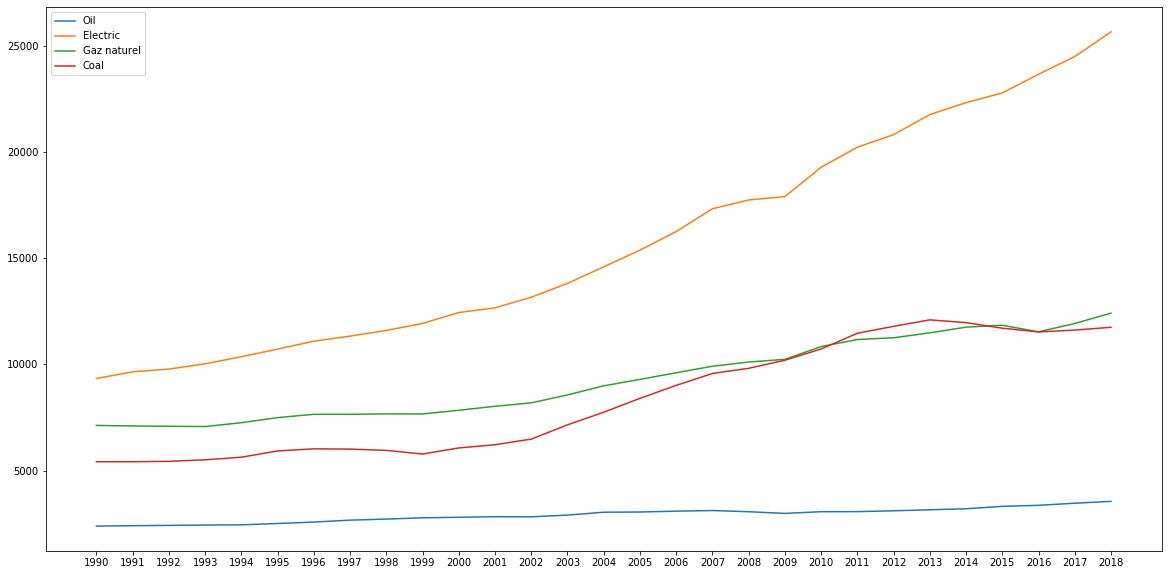

In [24]:
plt.figure(figsize=(20,10))
plot = fig.add_subplot(111)
plt.plot(Oil_nrj_cons.sum(),label ='Oil')
plt.plot(electric_nrj_cons.sum(),label ='Electric')
plt.plot(natural_gaz_nrj_cons.sum(),label ='Gaz naturel')
plt.plot(coal_lignite_nrj_cons.sum(),label ='Coal')
plt.legend()
plt.show()

Consommation totale d'énergie en MTEP (Méga-Tonnes Equivalent Pétrole) par type d'énergie de 1990 à 2018; Source: enerdata.fr

*Les consommations totales en énergie de tous types sont en hausse constante depuis 1990.*

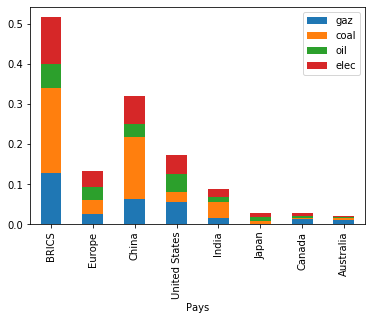

In [25]:
merge.plot.bar(stacked=True)

Consommation totale d'énergie en MTEP (Méga-Tonnes Equivalent Pétrole) par type d'énergie de 1990 à 2018; Source: enerdata.fr

*Les pays en voie de développement sont les pays les plus consommateurs en énergies, tous types confondus. 
Pour les pays en voie de développement, la consommation d énergie fossiles représente la majeure partie de la consommation.*

In [27]:
Top_10_total_rank

,Pays,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2012,2013,2014,2015,2016,2017,2018,evol_ytd,contribution,nb_nucleaire
0,OECD,4531,4581,4629,4701,4790,4880,5027,5074,5099,...,5293,5332,5283,5284,5293,5352,5419,0.001960,0.117876,10503.828333
1,G7,3497,3530,3572,3619,3685,3744,3835,3852,3879,...,3794,3842,3813,3797,3765,3788,3857,0.001029,0.083899,7476.151667
2,BRICS,2292,2275,2240,2266,2238,2320,2367,2364,2371,...,4742,4836,4956,4972,4984,5147,5323,0.013224,0.115788,10317.748333
3,Europe,1785,1780,1741,1742,1738,1781,1847,1835,1849,...,1856,1840,1779,1807,1824,1857,1847,0.000347,0.040177,3580.101667
4,European Union,1654,1653,1616,1615,1615,1651,1709,1690,1700,...,1650,1631,1570,1589,1598,1619,1602,-0.000314,0.034847,3105.210000
5,America,2583,2609,2665,2710,2781,2816,2889,2935,2979,...,3252,3319,3352,3320,3291,3308,3380,0.003086,0.073523,6551.566667
6,North America,2121,2136,2179,2221,2266,2296,2347,2371,2396,...,2421,2468,2497,2474,2454,2471,2558,0.002060,0.055643,4958.256667
7,United States,1910,1925,1964,1998,2036,2063,2108,2130,2156,...,2152,2196,2217,2194,2172,2180,2258,0.001822,0.049117,4376.756667
8,Asia,2113,2131,2210,2312,2417,2561,2647,2704,2694,...,5166,5302,5422,5473,5506,5672,5859,0.017728,0.127447,11356.695000
9,China,874,848,877,929,973,1045,1074,1073,1078,...,2821,2912,2965,2994,2965,3051,3164,0.026201,0.068825,6132.886667


Text(0.5, 1.0, "Evolution entre 1990 et 2018 de la consommation d'électricité")

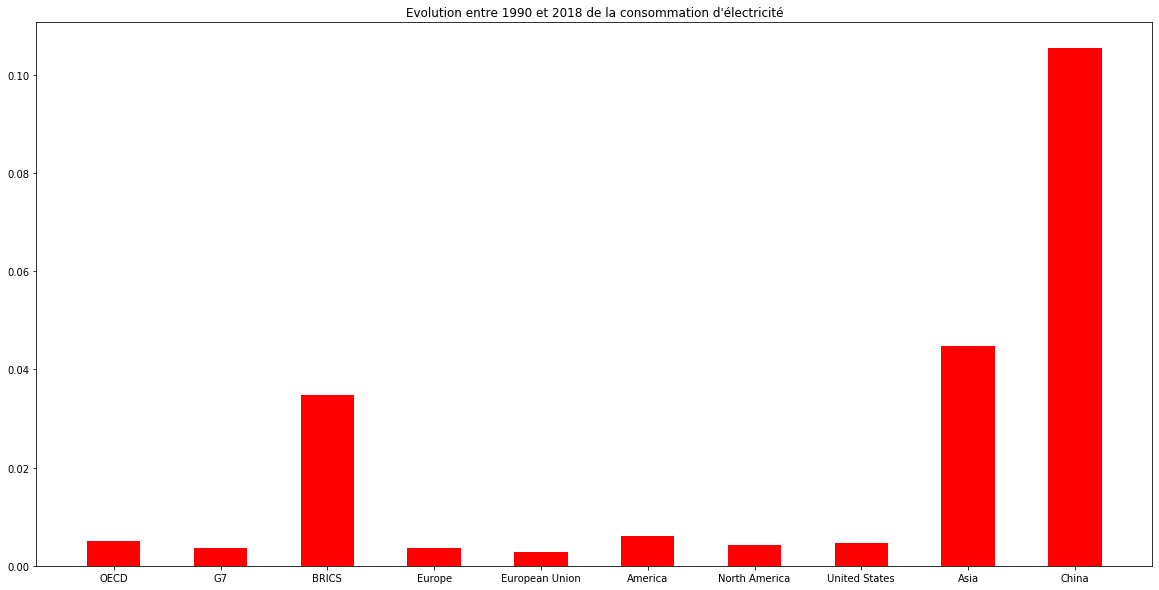

In [37]:
plt.figure(figsize=(20,10))
plt.bar(nrj_elect_rank['Pays'], nrj_elect_rank['evol_ytd'], width = 0.5, color = 'red')
plt.title("Evolution entre 1990 et 2018 de la consommation d'électricité")

Source: enerdata.fr

Text(0.5, 1.0, 'Evolution entre 1990 et 2018 de la consommation de gaz naturel')

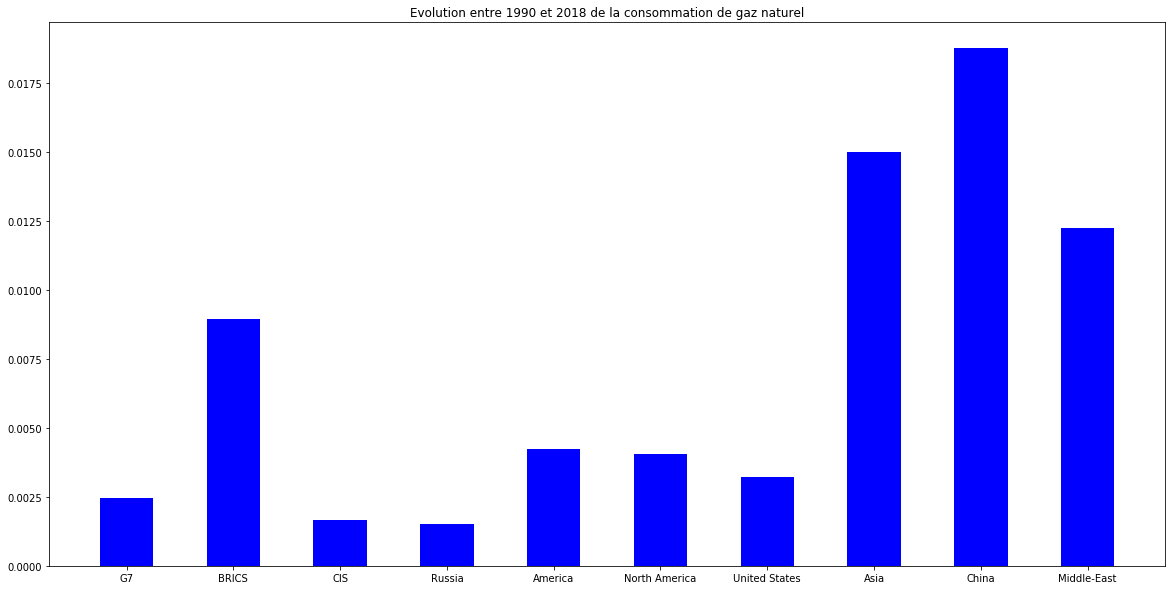

In [38]:
plt.figure(figsize=(20,10))
plt.bar(nrj_natural_rank['Pays'], nrj_natural_rank['evol_ytd'], width = 0.5, color = 'blue')
plt.title('Evolution entre 1990 et 2018 de la consommation de gaz naturel')

Source: enerdata.fr

Text(0.5, 1.0, 'Evolution entre 1990 et 2018 de la consommation de charbon')

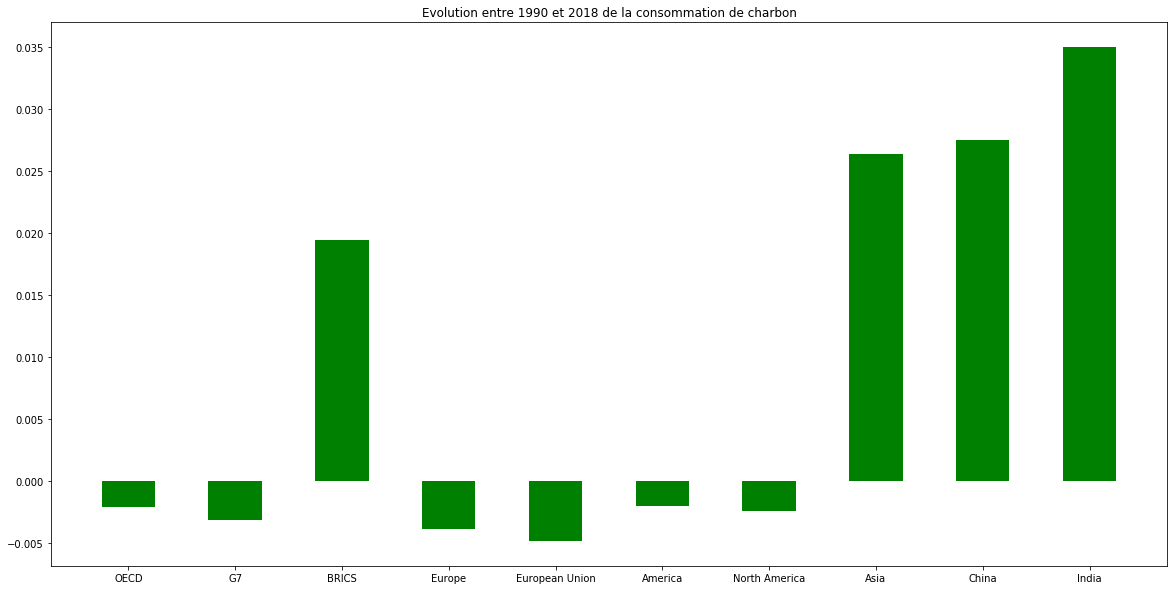

In [39]:
plt.figure(figsize=(20,10))
plt.bar(nrj_coal_rank['Pays'], nrj_coal_rank['evol_ytd'], width = 0.5, color = 'green')
plt.title('Evolution entre 1990 et 2018 de la consommation de charbon')

Source: enerdata.fr

Sur les cartes qui suivent, les zones en noir représentent des données manquantes.

In [43]:
country_geo = 'world-countries.json'
data = pd.read_csv('WDIData.csv')

# CO2 emissions (metric tons per capita)

hist_indicator =  'CO2 emissions (metric tons per capita)'
mask1 = data['Indicator Name']=='CO2 emissions (metric tons per capita)'#'#.str.contains(hist_indicator) 

stage = data[mask1]


data_to_plot = stage[['Country Code', '2014']]
hist_indicator = stage.iloc[0]['Indicator Name']

map = folium.Map(location=[50, 0], zoom_start=1.5)
map.choropleth(geo_data=country_geo, data=stage,
             columns=['Country Code', '2014'],
             key_on='feature.id',
             fill_color='YlGnBu', fill_opacity=0.7, line_opacity=0.2,
             legend_name=hist_indicator)
map

Emissions de CO2 par tete en tonnes. Source: Banque Mondiale, données 2014. 

*Les pays riches sont de manière générale les pays où le niveau de CO2 par habitants est les plus élevé.*

In [44]:
# Electricity production from coal sources (% of total)

hist_indicator =  'Electricity production from coal sources (% of total)'
mask1 = data['Indicator Name']=='Electricity production from coal sources (% of total)' 
stage = data[mask1]

data_to_plot = stage[['Country Code', '2014']]
hist_indicator = stage.iloc[0]['Indicator Name']

map = folium.Map(location=[50, 0], zoom_start=1.5)
map.choropleth(geo_data=country_geo, data=stage,
             columns=['Country Code', '2014'],
             key_on='feature.id',
             fill_color='YlGnBu', fill_opacity=0.7, line_opacity=0.2,
             legend_name=hist_indicator)
map

Production d'électricité à partir de charbon. Source: Banque Mondiale, données 2014. 

In [46]:
# Electricity production from hydroelectric sources (% of total)

hist_indicator =  'Electricity production from hydroelectric sources (% of total)'
mask1 = data['Indicator Name']=='Electricity production from hydroelectric sources (% of total)'
stage = data[mask1]

data_to_plot = stage[['Country Code', '2014']]
hist_indicator = stage.iloc[0]['Indicator Name']

map = folium.Map(location=[50, 0], zoom_start=1.5)
map.choropleth(geo_data=country_geo, data=stage,
             columns=['Country Code', '2014'],
             key_on='feature.id',
             fill_color='YlGnBu', fill_opacity=0.7, line_opacity=0.2,
             legend_name=hist_indicator)
map

Production d'électricité à partir de sources hydroélectriques. Source: Banque Mondiale, données 2014. 

In [47]:
# Electricity production from nuclear sources (% of total)

hist_indicator =  'Electricity production from nuclear sources (% of total)'
mask1 = data['Indicator Name']=='Electricity production from nuclear sources (% of total)'

stage = data[mask1]
data_to_plot = stage[['Country Code', '2014']]
hist_indicator = stage.iloc[0]['Indicator Name']

map = folium.Map(location=[50, 0], zoom_start=1.5)
map.choropleth(geo_data=country_geo, data=stage,
             columns=['Country Code', '2014'],
             key_on='feature.id',
             fill_color='YlGnBu', fill_opacity=0.7, line_opacity=0.2,
             legend_name=hist_indicator)
map

Production d'électricité à partir de sources nucléaires. Source: Banque Mondiale, données 2014. 

In [48]:
# Electricity production from oil, gas and coal sources (% of total)

hist_indicator =  'Electricity production from oil, gas and coal sources (% of total)'
mask1 = data['Indicator Name']=='Electricity production from oil, gas and coal sources (% of total)'
stage = data[mask1]
#stage.head()

data_to_plot = stage[['Country Code', '2014']]
hist_indicator = stage.iloc[0]['Indicator Name']

map = folium.Map(location=[50, 0], zoom_start=1.5)
map.choropleth(geo_data=country_geo, data=stage,
             columns=['Country Code', '2014'],
             key_on='feature.id',
             fill_color='YlGnBu', fill_opacity=0.7, line_opacity=0.2,
             legend_name=hist_indicator)
map

Production d'électricité à partir de sources fossiles. Source: Banque Mondiale, données 2014. 

In [50]:
hist_indicator =  'GDP per capita, PPP (current international $)'
mask1 = data['Indicator Name']=='GDP per capita, PPP (current international $)'
stage = data[mask1]

data_to_plot = stage[['Country Code', '2014']]

hist_indicator = stage.iloc[0]['Indicator Name']

map = folium.Map(location=[50, 0], zoom_start=1.5)
map.choropleth(geo_data=country_geo, data=stage,
             columns=['Country Code', '2014'],
             key_on='feature.id',
             fill_color='YlGnBu', fill_opacity=0.7, line_opacity=0.2,
             legend_name=hist_indicator)
map

PIB par habitants en dollars. Source: Banque Mondiale, données 2014. 

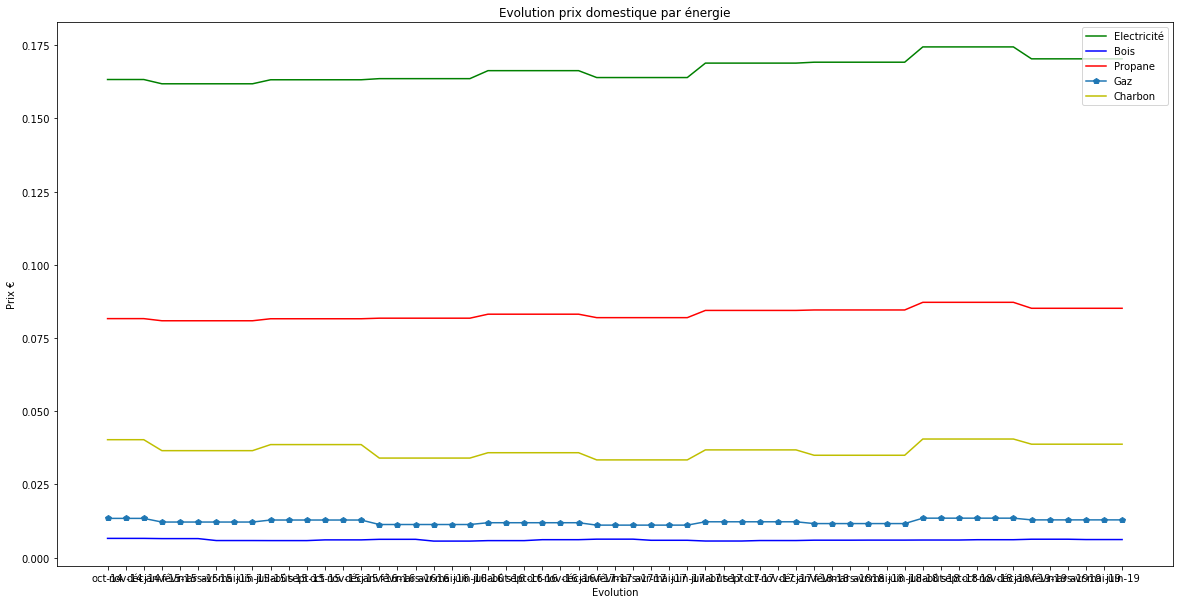

In [57]:






# Evolution du prix domestique des énergies sur les 5 dernières années

bois = pd.read_csv("C:/Users/Baptiste/Documents/TelecomParisTech/hackaton/prix/bois.csv", sep=",", encoding = "ISO-8859-1", header=1, index_col=0)
propane = pd.read_csv("C:/Users/Baptiste/Documents/TelecomParisTech/hackaton/prix/propane.csv", sep=",", encoding = "ISO-8859-1", header=1, index_col=0)
gaz = pd.read_csv("C:/Users/Baptiste/Documents/TelecomParisTech/hackaton/prix/gaz.csv", sep=",", encoding = "ISO-8859-1", header=1, index_col=0)
elec = pd.read_csv("C:/Users/Baptiste/Documents/TelecomParisTech/hackaton/prix/elec.csv", sep=",", encoding = "ISO-8859-1", header=1, index_col=0)

elec = elec.drop(columns=['janv-14','févr-14','mars-14','avr-14','mai-14','juin-14','juil-14','août-14','sept-14'])
gaz = gaz.drop(columns=['janv-14','févr-14','mars-14','avr-14','mai-14','juin-14','juil-14','août-14','sept-14'])
bois = bois.drop(columns=['juil-14','août-14','sept-14'])
propane = propane.drop(columns=['oct-19','sept-19','août-19','juil-19'])

plt.figure(figsize=(20,10))
plt.plot(elec.T['Toutes tranches']/100, 'g-', label='Electricité')
plt.plot(bois.T['100 kWh PCI de bois en sacs']/1000, 'b-', label='Bois')
plt.plot(elec.T['Toutes tranches']/200, 'r-', label='Propane')
plt.plot(gaz.T['Toutes tranches']/600, 'p-', label='Gaz')
plt.plot(gaz.T['Toutes tranches']/200, 'y-', label='Charbon')
plt.xlabel("Evolution")
plt.ylabel("Prix €")
plt.legend()
plt.title("Evolution prix domestique par énergie")
plt.show()

Ce graphe montre le prix domestique des énergies en France. Ceci illustre que le prix des énergies a un impact important dans le choix de l'énergie, notament pour les pays pauvres.

In [61]:
Lower_95 = pd.read_excel('UN_PPP2019_Output_PopTot.xls','Lower 95',skiprows=16)
Lower_80 = pd.read_excel('UN_PPP2019_Output_PopTot.xls','Lower 80',skiprows=16)
Median = pd.read_excel('UN_PPP2019_Output_PopTot.xls','Median',skiprows=16)
Upper_80 = pd.read_excel('UN_PPP2019_Output_PopTot.xls','Upper 80',skiprows=16)
Upper_95 = pd.read_excel('UN_PPP2019_Output_PopTot.xls','Upper 95',skiprows=16)

Lower_95 = Lower_95.drop(['Index','Unnamed: 4','Unnamed: 6','Notes'],axis = 1)
Lower_95 = Lower_95.set_index('Region, subregion, country or area')
Lower_80 = Lower_80.drop(['Index','Unnamed: 4','Unnamed: 6','Notes'],axis = 1)
Lower_80 = Lower_80.set_index('Region, subregion, country or area')
Median = Median.drop(['Index','Unnamed: 4','Unnamed: 6','Notes'],axis = 1)
Median = Median.set_index('Region, subregion, country or area')
Upper_80 = Upper_80.drop(['Index','Unnamed: 4','Unnamed: 6','Notes'],axis = 1)
Upper_80 = Upper_80.set_index('Region, subregion, country or area')
Upper_95 = Upper_95.drop(['Index','Unnamed: 4','Unnamed: 6','Notes'],axis = 1)
Upper_95 = Upper_95.set_index('Region, subregion, country or area')

def population_1000(df):
    df[2020] = df[2020]*1000
    df[2025] = df[2025]*1000
    df[2030] = df[2030]*1000
    df[2035] = df[2035]*1000
    df[2040] = df[2040]*1000
    df[2045] = df[2045]*1000
    df[2050] = df[2050]*1000
    df[2055] = df[2055]*1000
    df[2060] = df[2060]*1000
    df[2065] = df[2065]*1000
    df[2070] = df[2070]*1000
    df[2075] = df[2075]*1000
    df[2080] = df[2080]*1000
    df[2085] = df[2085]*1000
    df[2090] = df[2090]*1000
    df[2095] = df[2095]*1000
    df[2100] = df[2100]*1000
    
population_1000(Lower_95)
population_1000(Lower_80)
population_1000(Median)
population_1000(Upper_80)
population_1000(Upper_95)

Lower_95_T = Lower_95.transpose().iloc[3:,17:]
Lower_80_T = Lower_80.transpose().iloc[5:,17:]
Median_T = Median.transpose().iloc[2:,17:]
Upper_80_T = Upper_80.transpose().iloc[5:,17:]
Upper_95_T = Upper_95.transpose().iloc[5:,17:]

!!! get_externsheet_local_range: refx=4, not in range(4)
!!! get_externsheet_local_range: refx=5, not in range(4)
!!! get_externsheet_local_range: refx=4, not in range(4)
!!! get_externsheet_local_range: refx=5, not in range(4)
!!! get_externsheet_local_range: refx=4, not in range(4)
!!! get_externsheet_local_range: refx=5, not in range(4)
!!! get_externsheet_local_range: refx=4, not in range(4)
!!! get_externsheet_local_range: refx=5, not in range(4)
!!! get_externsheet_local_range: refx=4, not in range(4)
!!! get_externsheet_local_range: refx=5, not in range(4)


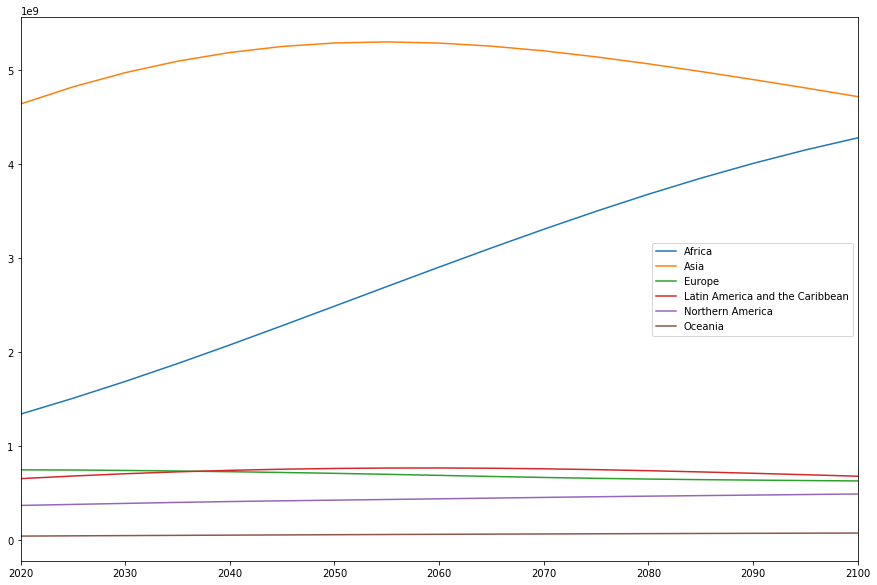

In [63]:
A = Median_T[['Africa','Asia','Europe']].iloc[:,:-1]
B = Median_T[['Latin America and the Caribbean','Northern America']].iloc[:,:-1]
C = Median_T['Oceania']
Median_Merge = A.join(B).join(C)
Median_Merge.fillna(0)
Median_Merge['Africa'] = pd.to_numeric(Median_Merge['Africa'])
Median_Merge['Asia'] = pd.to_numeric(Median_Merge['Asia'])
Median_Merge['Europe'] = pd.to_numeric(Median_Merge['Europe'])
Median_Merge['Latin America and the Caribbean'] = pd.to_numeric(Median_Merge['Latin America and the Caribbean'])
Median_Merge['Northern America'] = pd.to_numeric(Median_Merge['Northern America'])
Median_Merge['Oceania'] = pd.to_numeric(Median_Merge['Oceania'])
Median_Merge

Median_Merge.plot(figsize=(15,10))

Prédiction de la population mondiale jusqu'en 2100, source ONU

# 2 - Nouvelles énergies

In [51]:
hist_indicator =  'Renewable energy consumption (% of total final energy consumption)'
mask1 = data['Indicator Name']=='Renewable energy consumption (% of total final energy consumption)'
stage = data[mask1]

data_to_plot = stage[['Country Code', '2014']]

hist_indicator = stage.iloc[0]['Indicator Name']

map = folium.Map(location=[50, 0], zoom_start=1.5)
map.choropleth(geo_data=country_geo, data=stage,
             columns=['Country Code', '2014'],
             key_on='feature.id',
             fill_color='YlGnBu', fill_opacity=0.7, line_opacity=0.2,
             legend_name=hist_indicator)
map

Consommation d'énergies renouvelables en pourcentage de l'énergie totale consommé. Source: Banque Mondiale, données 2014. 

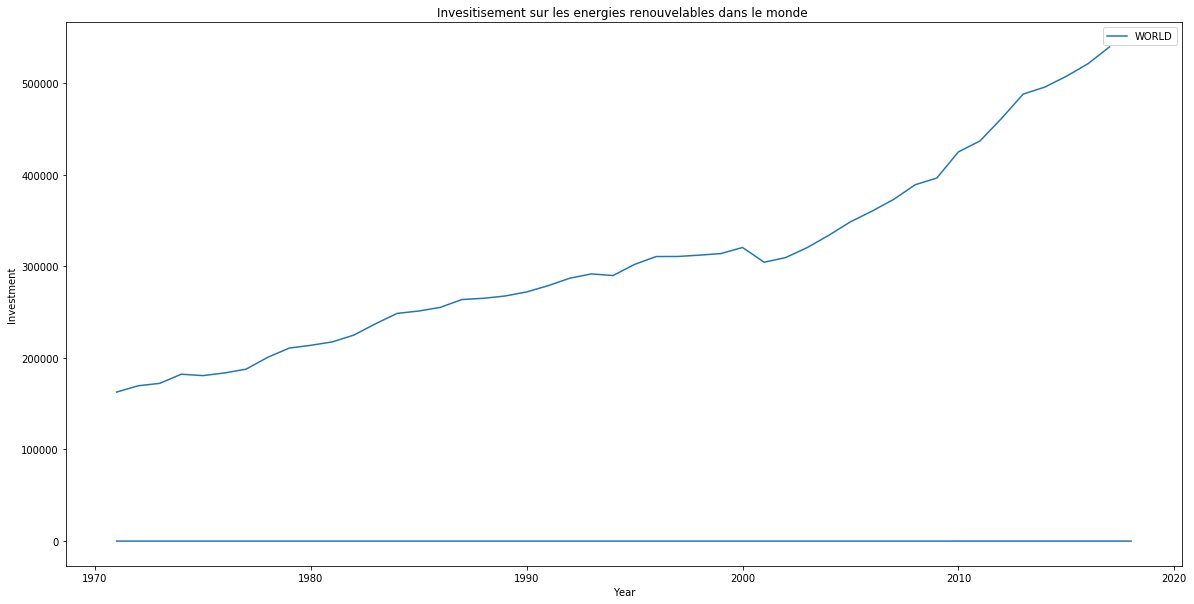

In [80]:
df = pd.read_csv('energierrr.csv')
plt.figure(figsize=(20,10))
data_world = df['LOCATION'].str.contains('OECD')
data_world = df[data_world]

plt.plot(data_world['TIME'].values, data_world['Value'].values, label = "WORLD")

plt.title('Invesitisement sur les energies renouvelables dans le monde ')
plt.xlabel('Year')
plt.ylabel('Investment')
plt.legend()
plt.show()

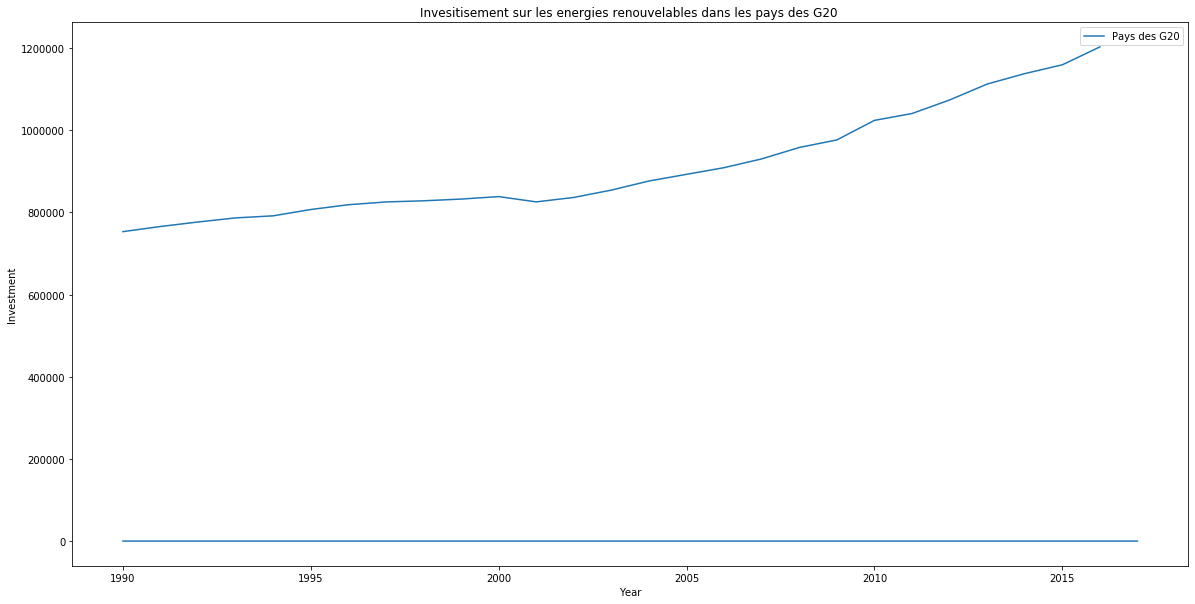

In [79]:
plt.figure(figsize=(20,10))
data_world = df['LOCATION'].str.contains('G20')
data_world = df[data_world]

plt.plot(data_world['TIME'].values, data_world['Value'].values, label = "Pays des G20")


plt.title('Invesitisement sur les energies renouvelables dans les pays des G20 ')
plt.xlabel('Year')
plt.ylabel('Investment')
plt.legend()
plt.show()

# 3 - Impact des nouvelles technologies

La deuxième filière la plus consommatrice en énergie est la filière transport.
Des changements sont en train d'être opérés technologiquement pour améliorer les consommations.

<img src='parenergie.png'>

# Rendement énergétique de la filière automobile

Text(0.5, 1.0, 'Evolution l/100 km véhicules vendus en France ')

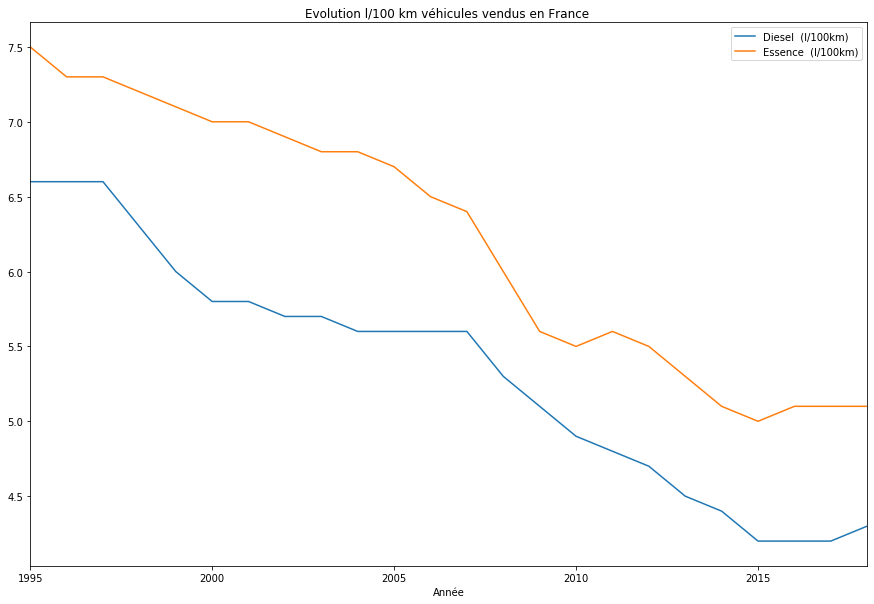

In [66]:
Conso = pd.read_csv('ADEME_export_evolutionConsoMoyenne.csv',encoding='cp1252',sep=';')
Conso = Conso.iloc[:-2,:]
Conso = Conso.set_index(['Année'])
Conso['Diesel  (l/100km)'] = pd.to_numeric(Conso['Diesel  (l/100km)'])
Conso['Essence  (l/100km)'] = pd.to_numeric(Conso['Essence  (l/100km)'])
Conso.plot(figsize=(15,10))
plt.title("Evolution l/100 km véhicules vendus en France ")

Source: Ademe

# Ventes sur la filière transport

Text(0.5, 1.0, 'Evolution vente véhicules par classe énergétique en France ')

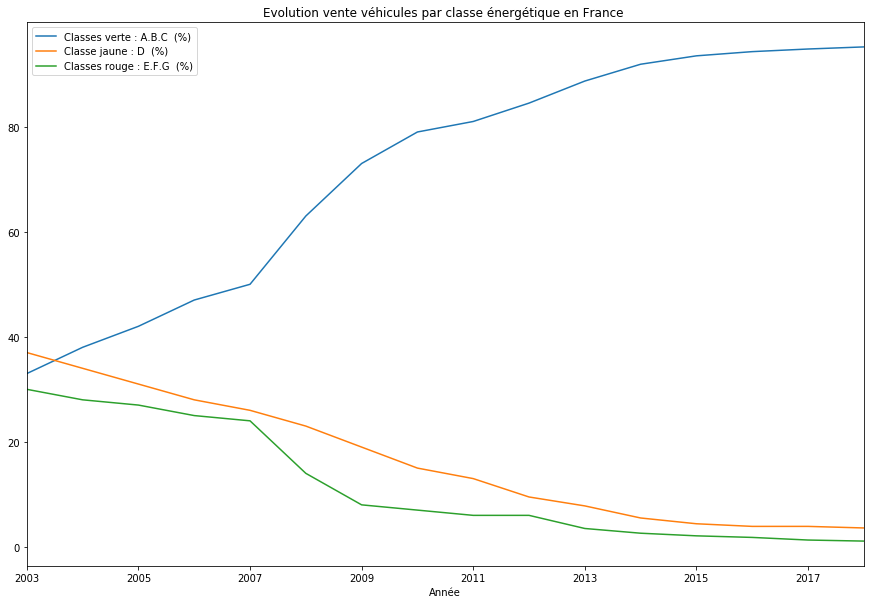

In [67]:
Ventes = pd.read_csv('ADEME_export_evolutionRepartitionVenteClasseCo2.csv',encoding='cp1252',sep=';')
Ventes = Ventes.iloc[:-2,:]
Ventes = Ventes.set_index(['Année'])
Ventes['Classes verte : A.B.C  (%)'] = pd.to_numeric(Ventes['Classes verte : A.B.C  (%)'])
Ventes['Classe jaune : D  (%)'] = pd.to_numeric(Ventes['Classe jaune : D  (%)'])
Ventes['Classes rouge : E.F.G  (%)'] = pd.to_numeric(Ventes['Classes rouge : E.F.G  (%)'])
Ventes.plot(figsize=(15,10))
plt.title("Evolution vente véhicules par classe énergétique en France ")

Source Ademe

In [68]:
Propres = pd.read_csv('ADEME_export_vehiculePropre.csv',encoding='cp1252',sep=';')
Propres = Propres.iloc[:-2,:]
Propres = Propres.set_index(['Année'])
Propres.fillna(0)

def val_mille(x):
    if isinstance(x, str):
        l = x.split()
        if len(l) == 2:
            return l[0]+l[1]
        else:
            return l[0]
    else:
        return x

Propres['GPL "première monte"  (ventes)'] = Propres['GPL "première monte"  (ventes)'].apply(lambda x: val_mille(x))
Propres['GPL "première monte"  (ventes)'] = pd.to_numeric(Propres['GPL "première monte"  (ventes)'])

Propres['Electrique  (ventes)'] = Propres['Electrique  (ventes)'].apply(lambda x: val_mille(x))
Propres['Electrique  (ventes)'] = pd.to_numeric(Propres['Electrique  (ventes)'])

Propres['GNV "Gaz Naturel"  (ventes)'] = Propres['GNV "Gaz Naturel"  (ventes)'].apply(lambda x: val_mille(x))
Propres['GNV "Gaz Naturel"  (ventes)'] = pd.to_numeric(Propres['GNV "Gaz Naturel"  (ventes)'])

Propres['Hybride rechargeable  (ventes)'] = Propres['Hybride rechargeable  (ventes)'].apply(lambda x: val_mille(x))
Propres['Hybride rechargeable  (ventes)'] = pd.to_numeric(Propres['Hybride rechargeable  (ventes)'])

Propres['Hybride non rechargeable  (ventes)'] = Propres['Hybride non rechargeable  (ventes)'].apply(lambda x: val_mille(x))
Propres['Hybride non rechargeable  (ventes)'] = pd.to_numeric(Propres['Hybride non rechargeable  (ventes)'])

Propres.fillna(0)

,"GPL ""première monte"" (ventes)",Electrique (ventes),"GNV ""Gaz Naturel"" (ventes)",Hybride rechargeable (ventes),Hybride non rechargeable (ventes)
Année,,,,,
1994,11.0,32.0,0.0,0.0,0.0
1995,254.0,132.0,0.0,0.0,0.0
1996,413.0,489.0,0.0,0.0,0.0
1997,6060.0,298.0,0.0,0.0,0.0
1998,22589.0,494.0,0.0,0.0,0.0
1999,14265.0,529.0,0.0,0.0,0.0
2000,6201.0,232.0,0.0,0.0,0.0
2001,5263.0,407.0,0.0,0.0,0.0
2002,5029.0,310.0,0.0,0.0,0.0


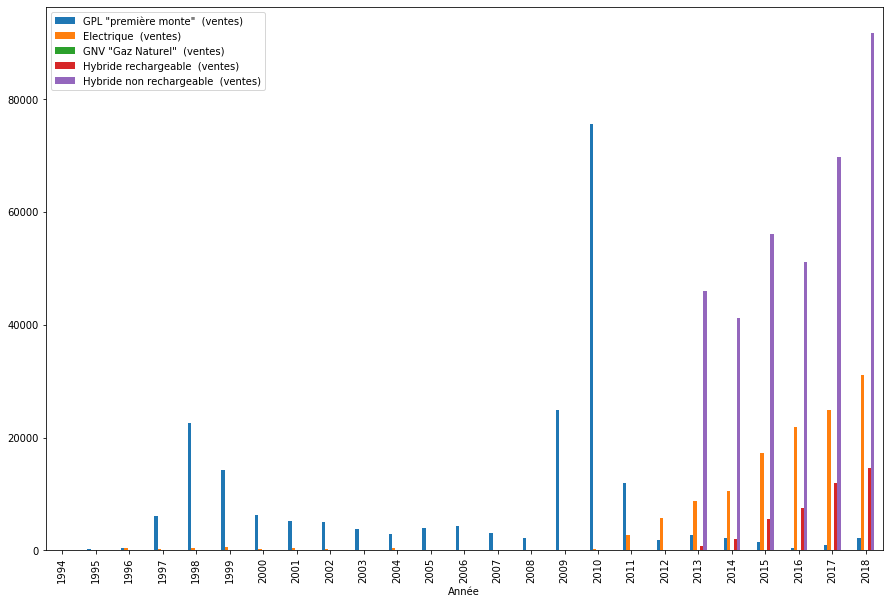

In [69]:
Propres.plot.bar(figsize = [15,10])

Evolution ventes de véhicules 'propres' en France - Source: Ademe

# Conclusion:

L'état actuel de l'utilisation des énergies est préoccupant. Les pays avec les plus fortes croissances (Chine, Inde ...) sont encore majoritairement utiliseurs d'energies fossiles. Cela s'explique par les faibles prix, et la disponibilité facile de cette ressource.
Neanmoins, les choses changent, comme nous l'avons vu, des investissements importants sont faits actuellement dans les énergies renouvelable. Certains pays sont déja tournés vers ces énergies propres.
Les avancées techniques vont nous permettre en parallèle de réduire notre consommation globale, ce qui pourrait permettre de contrebalancer l'évolution importante de la population mondiale, tirée par l'Asie et l'Afrique.
Il faut donc que ces continents se tournent le plus rapidement possible vers ces technologies.